In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_percentage_error as MAPE , mean_squared_error
from sklearn.model_selection import train_test_split

import warnings
import joblib

In [2]:
warnings.filterwarnings("ignore")
plt.style.use('ggplot')

In [3]:
df = pd.read_csv('./split/train.csv', low_memory=False)
df

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2793718,2,2016-06-08 07:36:19,1,-73.985611,40.735943,-73.980331,40.760468,N,1040
1,id3485529,2,2016-04-03 12:58:11,1,-73.978394,40.764351,-73.991623,40.749859,N,827
2,id1816614,2,2016-06-05 02:49:13,5,-73.989059,40.744389,-73.973381,40.748692,N,614
3,id1050851,2,2016-05-05 17:18:27,2,-73.990326,40.731136,-73.991264,40.748917,N,867
4,id0140657,1,2016-05-12 17:43:38,4,-73.789497,40.646675,-73.987137,40.759232,N,4967
...,...,...,...,...,...,...,...,...,...,...
999995,id2875371,2,2016-03-25 15:48:58,1,-73.959106,40.771770,-73.953995,40.786312,N,254
999996,id1038420,2,2016-05-04 19:36:44,1,-73.970978,40.764015,-73.956230,40.777851,N,434
999997,id3238884,2,2016-05-19 08:50:41,2,-73.982178,40.771240,-73.970749,40.758968,N,1306
999998,id3652642,2,2016-04-04 14:37:59,6,-73.982513,40.765533,-74.005974,40.711842,N,2317


# 1. Data Pre-Processing

## 1.1 Data OverView

In [4]:
df.head(5)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2793718,2,2016-06-08 07:36:19,1,-73.985611,40.735943,-73.980331,40.760468,N,1040
1,id3485529,2,2016-04-03 12:58:11,1,-73.978394,40.764351,-73.991623,40.749859,N,827
2,id1816614,2,2016-06-05 02:49:13,5,-73.989059,40.744389,-73.973381,40.748692,N,614
3,id1050851,2,2016-05-05 17:18:27,2,-73.990326,40.731136,-73.991264,40.748917,N,867
4,id0140657,1,2016-05-12 17:43:38,4,-73.789497,40.646675,-73.987137,40.759232,N,4967


In [5]:
df[['passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'trip_duration']]

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
0,1,-73.985611,40.735943,-73.980331,40.760468,1040
1,1,-73.978394,40.764351,-73.991623,40.749859,827
2,5,-73.989059,40.744389,-73.973381,40.748692,614
3,2,-73.990326,40.731136,-73.991264,40.748917,867
4,4,-73.789497,40.646675,-73.987137,40.759232,4967
...,...,...,...,...,...,...
999995,1,-73.959106,40.771770,-73.953995,40.786312,254
999996,1,-73.970978,40.764015,-73.956230,40.777851,434
999997,2,-73.982178,40.771240,-73.970749,40.758968,1306
999998,6,-73.982513,40.765533,-74.005974,40.711842,2317


In [6]:
df.tail(5)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
999995,id2875371,2,2016-03-25 15:48:58,1,-73.959106,40.771770,-73.953995,40.786312,N,254
999996,id1038420,2,2016-05-04 19:36:44,1,-73.970978,40.764015,-73.956230,40.777851,N,434
999997,id3238884,2,2016-05-19 08:50:41,2,-73.982178,40.771240,-73.970749,40.758968,N,1306
999998,id3652642,2,2016-04-04 14:37:59,6,-73.982513,40.765533,-74.005974,40.711842,N,2317
999999,id0887693,2,2016-02-24 11:30:56,1,-73.970810,40.761436,-73.991852,40.734692,N,1207


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1000000 non-null  object 
 1   vendor_id           1000000 non-null  int64  
 2   pickup_datetime     1000000 non-null  object 
 3   passenger_count     1000000 non-null  int64  
 4   pickup_longitude    1000000 non-null  float64
 5   pickup_latitude     1000000 non-null  float64
 6   dropoff_longitude   1000000 non-null  float64
 7   dropoff_latitude    1000000 non-null  float64
 8   store_and_fwd_flag  1000000 non-null  object 
 9   trip_duration       1000000 non-null  int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 76.3+ MB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
vendor_id,1000000.0,1.534793,0.498788,1.000000,1.000000,2.000000,2.000000,2.000000e+00
passenger_count,1000000.0,1.665353,1.315723,0.000000,1.000000,1.000000,2.000000,7.000000e+00
pickup_longitude,1000000.0,-73.973475,0.065404,-121.933342,-73.991852,-73.981728,-73.967346,-6.133553e+01
pickup_latitude,1000000.0,40.750947,0.033745,34.359695,40.737372,40.754131,40.768379,5.188108e+01
dropoff_longitude,1000000.0,-73.973421,0.065432,-121.933304,-73.991341,-73.979767,-73.963036,-6.133553e+01
dropoff_latitude,1000000.0,40.751829,0.035782,34.359695,40.735928,40.754551,40.769833,4.392103e+01
trip_duration,1000000.0,954.884971,3882.070116,1.000000,397.000000,662.000000,1074.000000,2.227612e+06


In [9]:
df['vendor_id'].unique()

array([2, 1])

In [10]:
df.corr(numeric_only=True)['trip_duration'].to_frame().style.background_gradient(cmap='OrRd')

,trip_duration
vendor_id,0.028762
passenger_count,0.012249
pickup_longitude,0.035457
pickup_latitude,-0.034007
dropoff_longitude,0.021856
dropoff_latitude,-0.027749
trip_duration,1.000000


<Axes: >

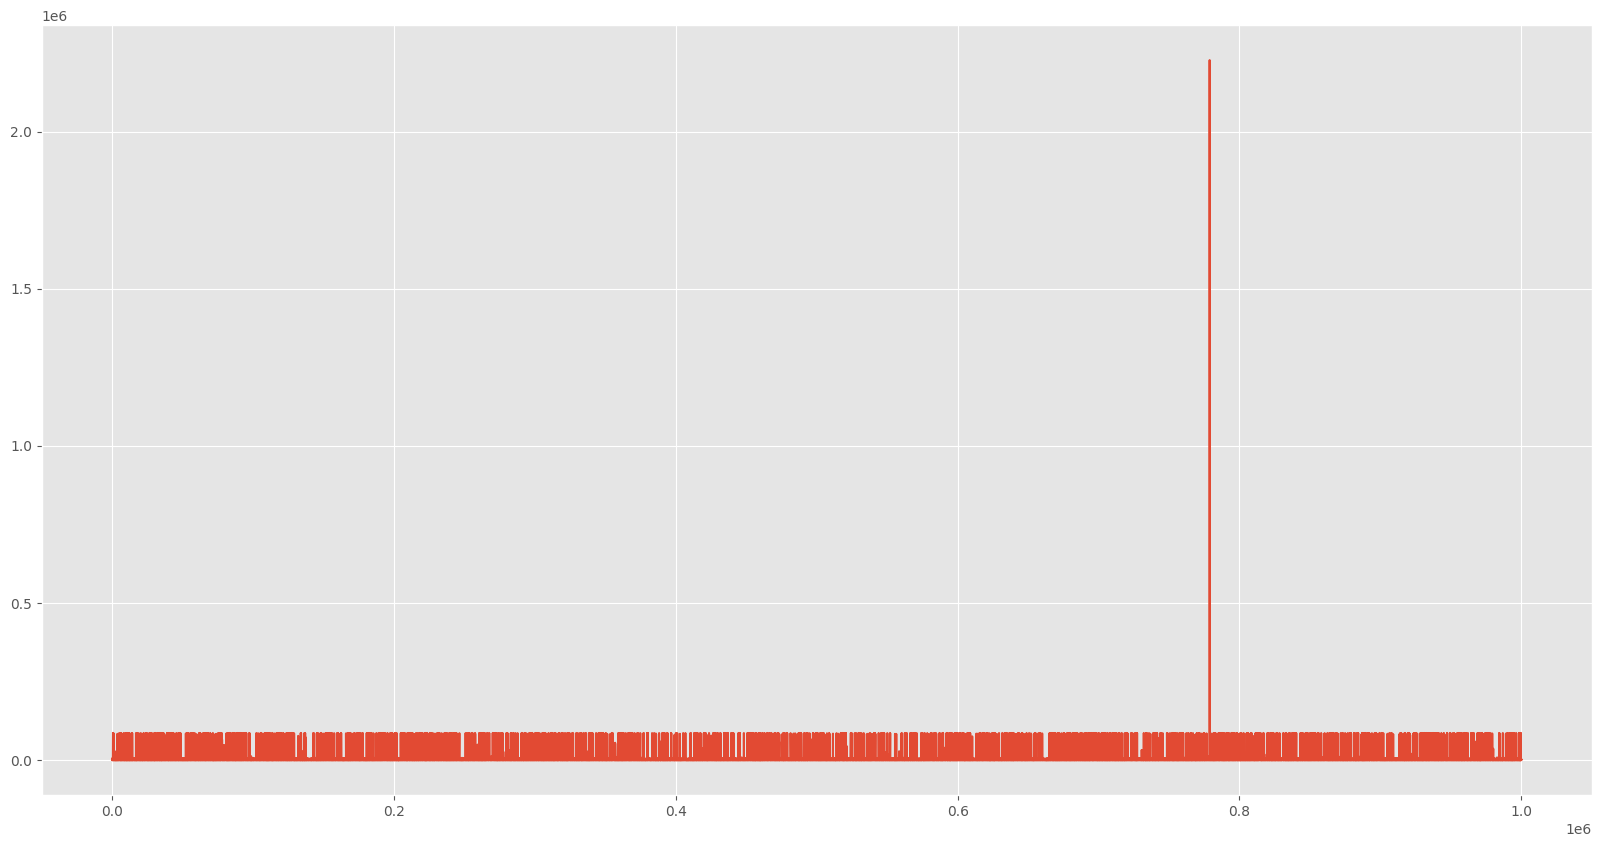

In [11]:
plt.figure(figsize=(20,10))
df['trip_duration'].plot()

### 1.There are some Categorical values that we need to get rid of.
### 2.We need to deeply check about any kind of missing or duplicated values
### 3.Our Target Value need some operations.
### 4.We need to set pickup_datetime as index column.

## 1.2 : Set pickup_datetime as date time index

In [12]:
df.set_index('pickup_datetime', drop=True, inplace=True)

In [13]:
df.index =  pd.to_datetime(df.index)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000000 entries, 2016-06-08 07:36:19 to 2016-02-24 11:30:56
Data columns (total 9 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1000000 non-null  object 
 1   vendor_id           1000000 non-null  int64  
 2   passenger_count     1000000 non-null  int64  
 3   pickup_longitude    1000000 non-null  float64
 4   pickup_latitude     1000000 non-null  float64
 5   dropoff_longitude   1000000 non-null  float64
 6   dropoff_latitude    1000000 non-null  float64
 7   store_and_fwd_flag  1000000 non-null  object 
 8   trip_duration       1000000 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 76.3+ MB


## 2.3: drop Catogrical Data

In [15]:
df.drop(columns=['id', 'vendor_id','store_and_fwd_flag'], inplace=True)
df.sort_index(inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000000 entries, 2016-01-01 00:00:53 to 2016-06-30 23:59:37
Data columns (total 6 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   passenger_count    1000000 non-null  int64  
 1   pickup_longitude   1000000 non-null  float64
 2   pickup_latitude    1000000 non-null  float64
 3   dropoff_longitude  1000000 non-null  float64
 4   dropoff_latitude   1000000 non-null  float64
 5   trip_duration      1000000 non-null  int64  
dtypes: float64(4), int64(2)
memory usage: 53.4 MB


## 2.4: deeply check about missing data

In [17]:
df.isna().sum()

passenger_count      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
trip_duration        0
dtype: int64

In [18]:
df

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
pickup_datetime,,,,,,
2016-01-01 00:00:53,1,-73.985085,40.747166,-73.958038,40.717491,1294
2016-01-01 00:01:20,1,-73.970108,40.759800,-73.989357,40.742989,736
2016-01-01 00:01:47,2,-73.993103,40.752632,-73.953903,40.816540,1204
2016-01-01 00:02:06,1,-73.985443,40.735710,-73.957489,40.811611,1310
2016-01-01 00:02:45,1,-73.993736,40.741760,-74.004669,40.745468,445
...,...,...,...,...,...,...
2016-06-30 23:58:47,2,-73.991402,40.750122,-73.989288,40.773579,849
2016-06-30 23:58:52,1,-73.982750,40.745289,-73.969002,40.757950,472
2016-06-30 23:59:09,2,-73.955109,40.689564,-73.978203,40.685802,754


## 2.5: deeply check about duplicated data

In [19]:
df.duplicated().sum()

np.int64(6)

In [20]:
df[df.duplicated()].sort_values(by='trip_duration')

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
pickup_datetime,,,,,,
2016-02-16 21:36:35,2,-74.008034,40.723553,-74.008034,40.723553,31
2016-04-26 16:46:00,1,-77.039436,38.898849,-77.039436,38.898849,60
2016-05-19 12:53:00,1,-77.039436,38.898849,-77.039436,38.898849,60
2016-03-05 18:22:41,2,-73.997292,40.691071,-73.999428,40.683388,149
2016-05-04 14:54:59,4,-73.958336,40.800922,-73.959106,40.801910,149
2016-01-21 12:04:53,3,-73.800667,40.645954,-73.985809,40.763363,5413


#### *Will not affect the model

## 2.6 Target Variable Working With (Getting a Copy For Orginal Values For EDA)

In [21]:
df['trip_duration'].describe()

count    1.000000e+06
mean     9.548850e+02
std      3.882070e+03
min      1.000000e+00
25%      3.970000e+02
50%      6.620000e+02
75%      1.074000e+03
max      2.227612e+06
Name: trip_duration, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x73a2aab5dbb0>,
 'caps': [<matplotlib.lines.Line2D at 0x73a2aab5e1b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x73a2aab5d970>],
 'medians': [<matplotlib.lines.Line2D at 0x73a2aab5e7e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x73a2aab5eb10>],
 'means': []}

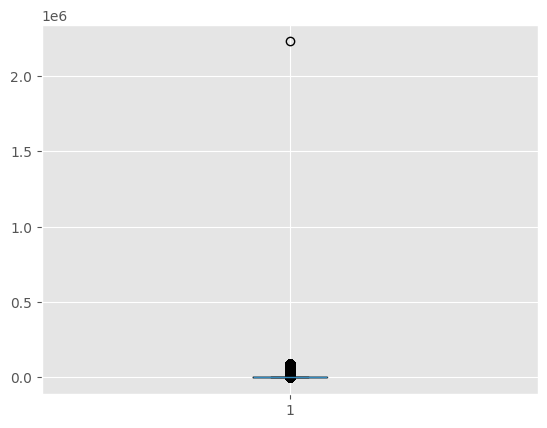

In [22]:
plt.boxplot(df['trip_duration'])

In [23]:
df.sort_values(by = 'trip_duration', ascending=False)

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
pickup_datetime,,,,,,
2016-01-05 06:14:15,1,-73.983788,40.742325,-73.985489,40.727676,2227612
2016-02-15 23:18:06,2,-73.794525,40.644825,-73.991051,40.755573,86392
2016-05-31 13:00:39,1,-73.781952,40.644688,-73.993874,40.745926,86391
2016-05-06 00:00:10,1,-73.996010,40.753220,-73.979027,40.740601,86390
2016-06-23 16:01:45,1,-73.782089,40.644806,-73.985016,40.666828,86385
...,...,...,...,...,...,...
2016-05-17 09:03:38,1,-73.819893,40.740822,-73.819885,40.740822,1
2016-01-20 05:53:45,1,-73.807213,40.658192,-73.807259,40.658051,1
2016-04-15 17:32:22,1,-73.782417,40.644154,-73.782433,40.644169,1


In [24]:
# Extract Outlier
IQR = df['trip_duration'].describe()['75%'] - df['trip_duration'].describe()['25%']
upper = 3 * IQR + df['trip_duration'].describe()['75%']
lower = df['trip_duration'].describe()['25%'] - 1.5 * IQR 

In [25]:
df[df['trip_duration'] > upper]

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
pickup_datetime,,,,,,
2016-01-01 00:09:55,4,-73.988571,40.758755,-73.864708,40.834286,3582
2016-01-01 01:15:12,1,-73.987511,40.765442,-74.445732,40.494949,4458
2016-01-01 01:17:31,1,-73.976624,40.752907,-73.944366,40.708576,3138
2016-01-01 01:22:33,2,-73.987411,40.720211,-73.812614,40.981007,4013
2016-01-01 01:49:17,1,-74.005859,40.725822,-73.909920,40.821087,3322
...,...,...,...,...,...,...
2016-06-30 23:05:59,2,-73.984352,40.780006,-73.982689,40.771656,86164
2016-06-30 23:21:42,5,-73.783562,40.648655,-74.009155,40.714680,3887
2016-06-30 23:37:45,2,-74.005180,40.751232,-73.962563,40.649677,3487


In [26]:
df[df['trip_duration'] < lower]

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
pickup_datetime,,,,,,


In [27]:
# let's delete this outlier row
df.drop(index = ['2016-01-05 06:14:15'], inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x73a2aa9bd5b0>,
 'caps': [<matplotlib.lines.Line2D at 0x73a2aa9bdb50>,
 'boxes': [<matplotlib.lines.Line2D at 0x73a2aa9bd3d0>],
 'medians': [<matplotlib.lines.Line2D at 0x73a2aa9be120>],
 'fliers': [<matplotlib.lines.Line2D at 0x73a2aa9be3f0>],
 'means': []}

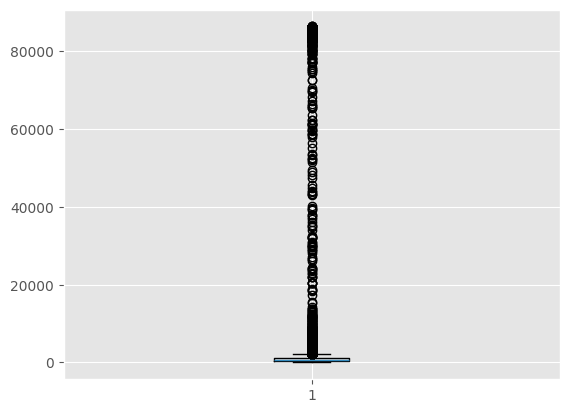

In [28]:
plt.boxplot(df['trip_duration'])

## We can't -Till now- say that these values are outliers, because we didn't get the relation between the data and target untill now.
## Another Solution: USING LOG1P, To better scale the target

In [29]:
only_EDA = df.copy()
df['trip_duration'] = np.log1p(df['trip_duration'])

In [30]:
df['trip_duration'].describe()

count    999999.000000
mean          6.466484
std           0.794702
min           0.693147
25%           5.986452
50%           6.496775
75%           6.980076
max          11.366662
Name: trip_duration, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x73a2aaa246e0>,
 'caps': [<matplotlib.lines.Line2D at 0x73a2aab5f470>,
 'boxes': [<matplotlib.lines.Line2D at 0x73a2aaa24410>],
 'medians': [<matplotlib.lines.Line2D at 0x73a2aaa24da0>],
 'fliers': [<matplotlib.lines.Line2D at 0x73a2aaa25070>],
 'means': []}

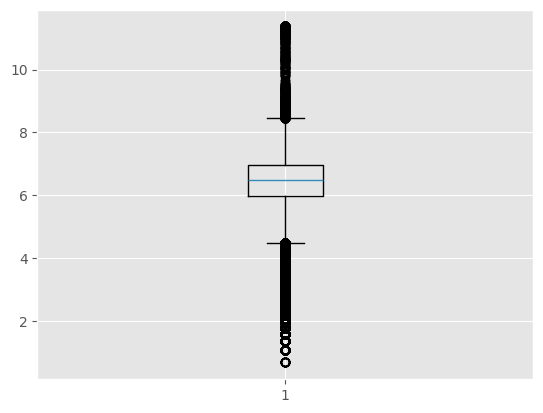

In [31]:
plt.boxplot(df['trip_duration'])

## 2.7 Transforming columns size to 16bits

In [32]:
# df = df.astype('float32')

In [33]:
# df['passenger_count'] = df['passenger_count'].astype('int8')

## All Done Untill Now -_0

# 3. Exploratory Data Analysis

In [34]:
df

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
pickup_datetime,,,,,,
2016-01-01 00:00:53,1,-73.985085,40.747166,-73.958038,40.717491,7.166266
2016-01-01 00:01:20,1,-73.970108,40.759800,-73.989357,40.742989,6.602588
2016-01-01 00:01:47,2,-73.993103,40.752632,-73.953903,40.816540,7.094235
2016-01-01 00:02:06,1,-73.985443,40.735710,-73.957489,40.811611,7.178545
2016-01-01 00:02:45,1,-73.993736,40.741760,-74.004669,40.745468,6.100319
...,...,...,...,...,...,...
2016-06-30 23:58:47,2,-73.991402,40.750122,-73.989288,40.773579,6.745236
2016-06-30 23:58:52,1,-73.982750,40.745289,-73.969002,40.757950,6.159095
2016-06-30 23:59:09,2,-73.955109,40.689564,-73.978203,40.685802,6.626718


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 999999 entries, 2016-01-01 00:00:53 to 2016-06-30 23:59:37
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   passenger_count    999999 non-null  int64  
 1   pickup_longitude   999999 non-null  float64
 2   pickup_latitude    999999 non-null  float64
 3   dropoff_longitude  999999 non-null  float64
 4   dropoff_latitude   999999 non-null  float64
 5   trip_duration      999999 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 53.4 MB


## 3.1 Best Hour Getting Passengers during the day

In [36]:
hours = []
pass_numbers = []
for i in range(24):
    hours.append(i)
    pass_numbers.append(only_EDA[only_EDA.index.hour == i]['passenger_count'].sum())

<BarContainer object of 24 artists>

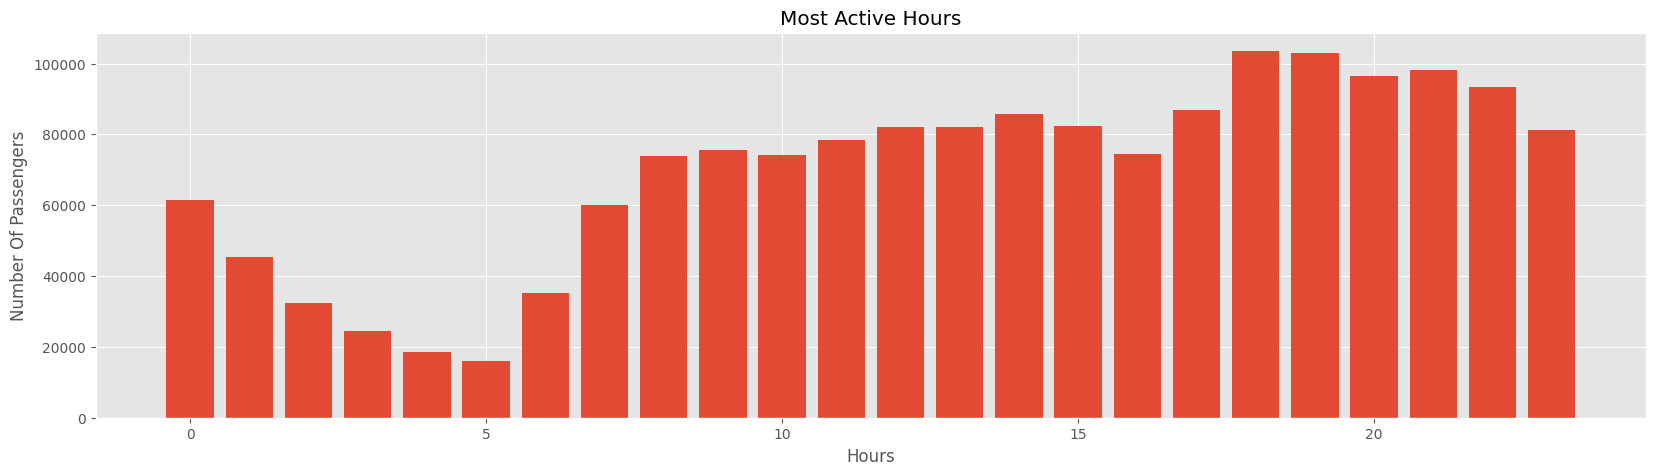

In [37]:
plt.figure(figsize=(20,5))
plt.title("Most Active Hours")
plt.xlabel("Hours")
plt.ylabel("Number Of Passengers")
plt.bar(x=hours, height=pass_numbers)

## 3.2 Best Month Getting Passengers during the day

In [38]:
months = []
pass_numbers = []
for i in range(1, 7):
    months.append(i)
    pass_numbers.append(only_EDA[only_EDA.index.month == i]['passenger_count'].sum())

<BarContainer object of 6 artists>

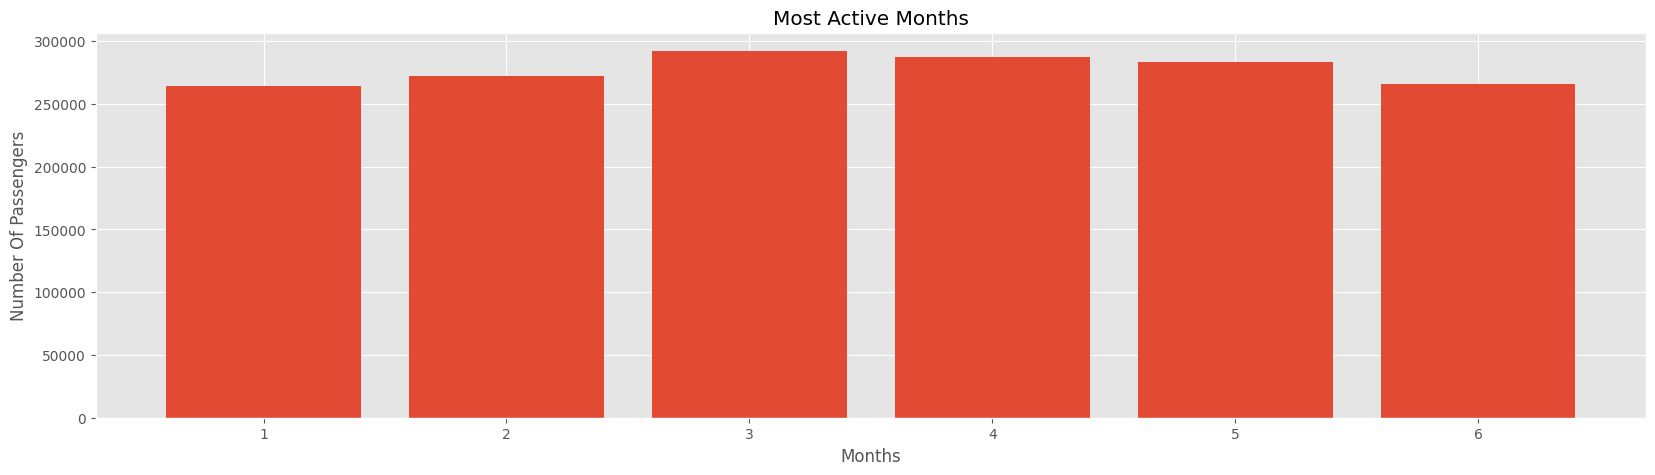

In [39]:
plt.figure(figsize=(20,5))
plt.title("Most Active Months")
plt.xlabel("Months")
plt.ylabel("Number Of Passengers")
plt.bar(x=months, height=pass_numbers)

## 3.3 Best Day Getting Passengers during the day

In [40]:
days = []
pass_numbers = []
for i in range(1, 32):
    days.append(i)
    pass_numbers.append(only_EDA[only_EDA.index.day == i]['passenger_count'].sum())

<BarContainer object of 31 artists>

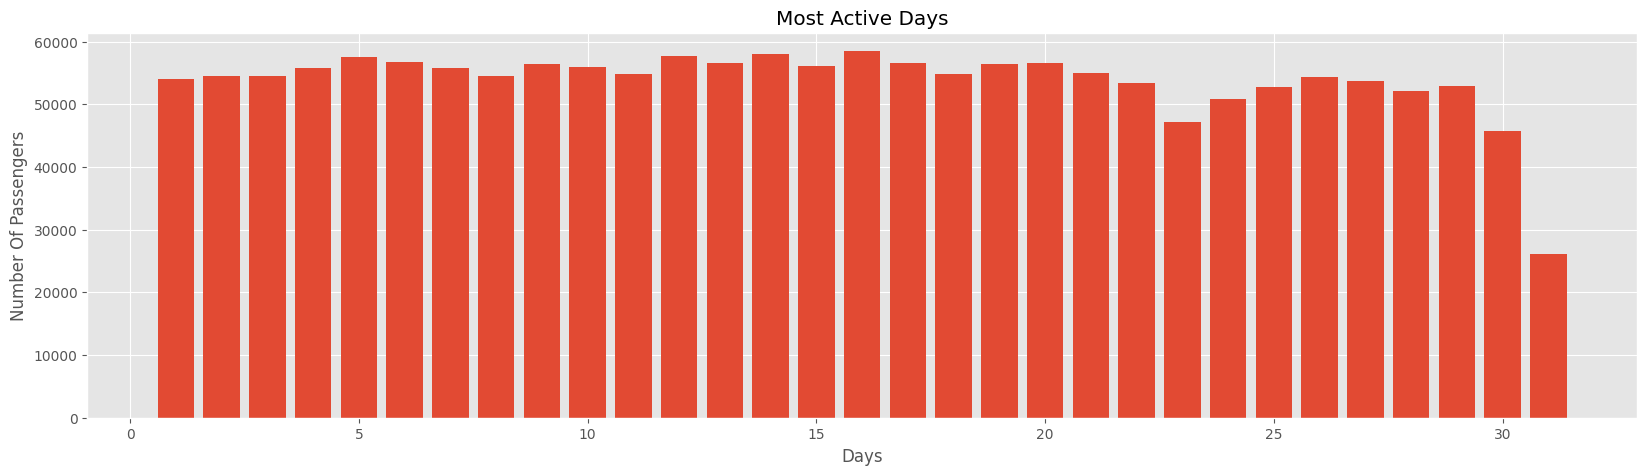

In [41]:
plt.figure(figsize=(20,5))
plt.title("Most Active Days")
plt.xlabel("Days")
plt.ylabel("Number Of Passengers")
plt.bar(x=days, height=pass_numbers)

## 3.4: Most Place Starting From, and Most Place Dropping OFF IN

In [42]:
trip_dur = only_EDA.groupby(['pickup_longitude', 'pickup_latitude']).sum('trip_duration')

In [43]:
trip_dur.sort_values(by='trip_duration', ascending=False)['trip_duration'].head(10)

pickup_longitude  pickup_latitude
-73.870857        40.773731          102465
-73.862831        40.769081           97092
-73.862770        40.768768           90108
-73.976158        40.740871           88983
-73.870857        40.773705           88644
-73.994156        40.750942           88618
-73.776703        40.645370           88614
-73.984909        40.747860           88429
-73.974709        40.757347           88338
-73.862778        40.768848           88206
Name: trip_duration, dtype: int64

In [44]:
# Dropping OFF
trip_dur2 = only_EDA.groupby(['dropoff_longitude', 'dropoff_latitude']).sum('trip_duration')
trip_dur2.sort_values(by='trip_duration', ascending=False)['trip_duration'].head(10)

dropoff_longitude  dropoff_latitude
-73.790031         40.646938           90194
-73.782852         40.648842           90147
-73.960831         40.765732           88814
-73.865562         40.770882           88586
-73.872406         40.774429           88544
-73.789894         40.643250           88234
-73.986519         40.758301           88117
-73.864433         40.770061           87994
-73.871078         40.774048           87754
-73.981407         40.764969           87650
Name: trip_duration, dtype: int64

In [45]:
only_EDA

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
pickup_datetime,,,,,,
2016-01-01 00:00:53,1,-73.985085,40.747166,-73.958038,40.717491,1294
2016-01-01 00:01:20,1,-73.970108,40.759800,-73.989357,40.742989,736
2016-01-01 00:01:47,2,-73.993103,40.752632,-73.953903,40.816540,1204
2016-01-01 00:02:06,1,-73.985443,40.735710,-73.957489,40.811611,1310
2016-01-01 00:02:45,1,-73.993736,40.741760,-74.004669,40.745468,445
...,...,...,...,...,...,...
2016-06-30 23:58:47,2,-73.991402,40.750122,-73.989288,40.773579,849
2016-06-30 23:58:52,1,-73.982750,40.745289,-73.969002,40.757950,472
2016-06-30 23:59:09,2,-73.955109,40.689564,-73.978203,40.685802,754


## 3.5 Shown Relation Between Passengers Numbers and duration

In [46]:
pass_numbers = sorted(only_EDA['passenger_count'].unique())
summ_durations = []
for i in pass_numbers:
    summ_durations.append(only_EDA.loc[only_EDA['passenger_count'] == i, 'trip_duration'].sum())

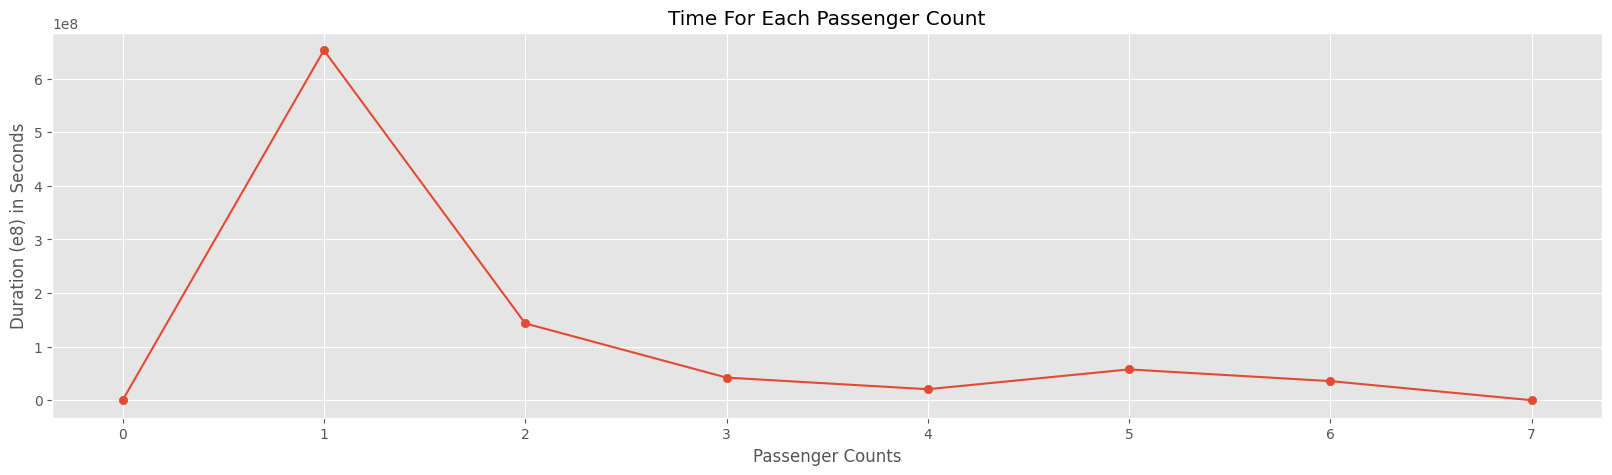

In [47]:
plt.figure(figsize=(20,5))
plt.title("Time For Each Passenger Count")
plt.xlabel("Passenger Counts")
plt.ylabel("Duration (e8) in Seconds")
plt.scatter(pass_numbers, summ_durations)
plt.plot(pass_numbers, summ_durations)

In [48]:
only_EDA

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
pickup_datetime,,,,,,
2016-01-01 00:00:53,1,-73.985085,40.747166,-73.958038,40.717491,1294
2016-01-01 00:01:20,1,-73.970108,40.759800,-73.989357,40.742989,736
2016-01-01 00:01:47,2,-73.993103,40.752632,-73.953903,40.816540,1204
2016-01-01 00:02:06,1,-73.985443,40.735710,-73.957489,40.811611,1310
2016-01-01 00:02:45,1,-73.993736,40.741760,-74.004669,40.745468,445
...,...,...,...,...,...,...
2016-06-30 23:58:47,2,-73.991402,40.750122,-73.989288,40.773579,849
2016-06-30 23:58:52,1,-73.982750,40.745289,-73.969002,40.757950,472
2016-06-30 23:59:09,2,-73.955109,40.689564,-73.978203,40.685802,754


## 3.6: Most Hours with Most Days 

In [49]:
only_EDA['hour'] = only_EDA.index.hour
only_EDA['day_name'] = only_EDA.index.day_name()

Text(220.72222222222223, 0.5, 'Hour Of the Day')

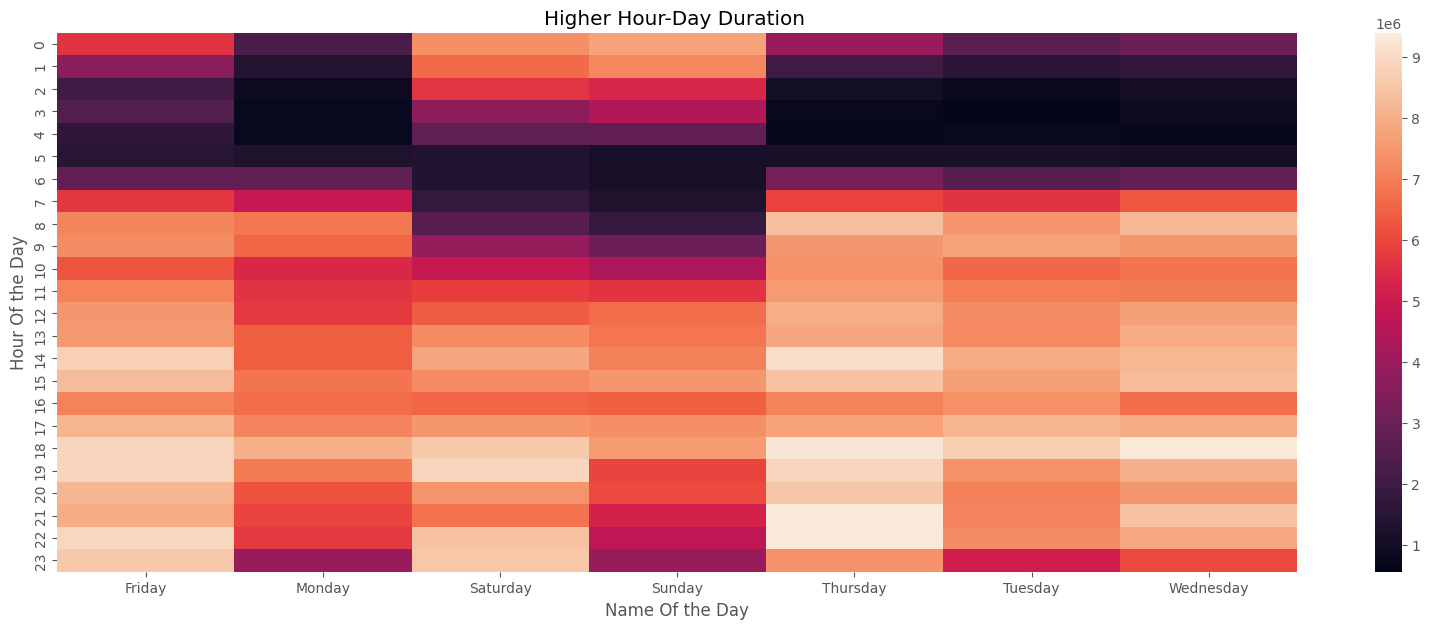

In [50]:
plt.figure(figsize=(20,7))
sns.heatmap(data=pd.crosstab(only_EDA['hour'], only_EDA['day_name'], values=only_EDA['trip_duration'], aggfunc='sum'))
plt.title('Higher Hour-Day Duration ')
plt.xlabel('Name Of the Day')
plt.ylabel('Hour Of the Day')

## 3.7: Most Days with Most Months 

In [51]:
only_EDA['month_name'] = only_EDA.index.month_name()

Text(0.5, 47.7222222222222, 'Month Name')

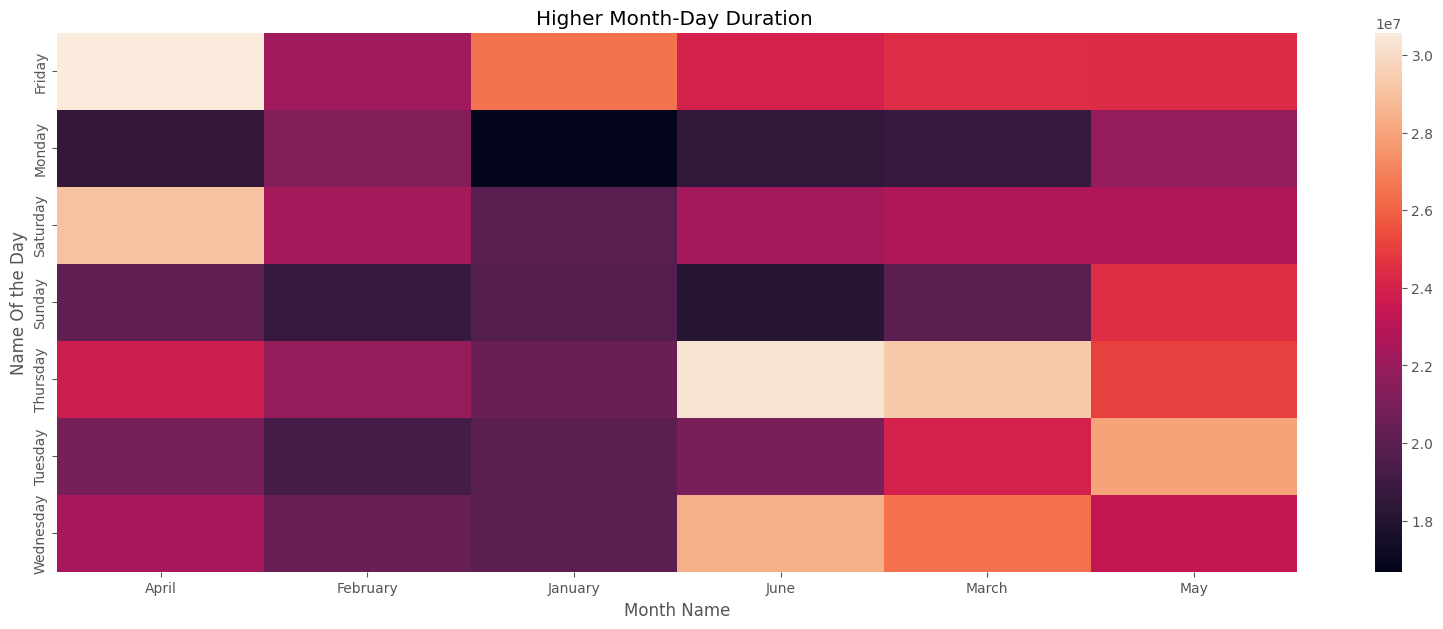

In [52]:
plt.figure(figsize=(20,7))
sns.heatmap(data=pd.crosstab(only_EDA['day_name'], only_EDA['month_name'], values=only_EDA['trip_duration'], aggfunc='sum'))
plt.title('Higher Month-Day Duration ')
plt.ylabel('Name Of the Day')
plt.xlabel('Month Name')

In [53]:
data = only_EDA.groupby(only_EDA.index.date).aggregate({'trip_duration' : ['mean', 'median']})

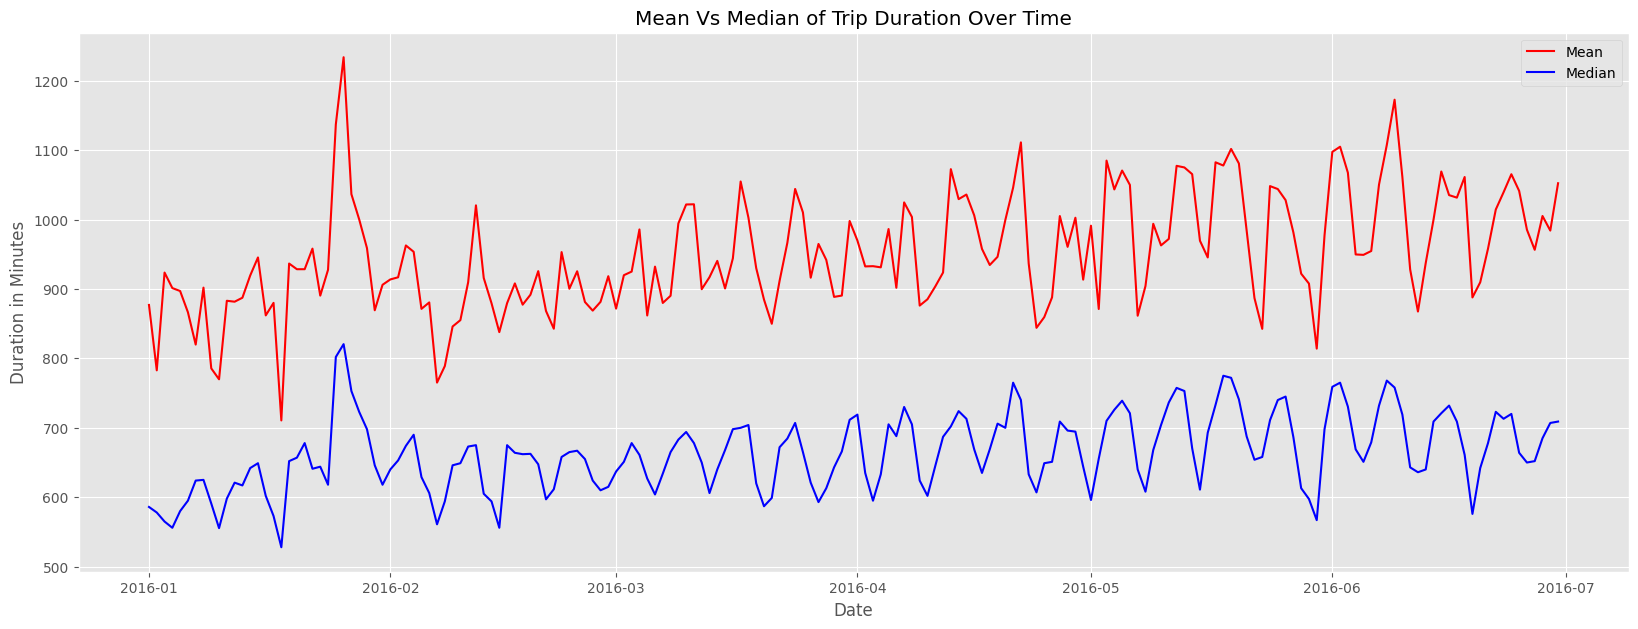

In [54]:

plt.figure(figsize=(20, 7))

plt.plot(data.iloc[:, 0], color='red', label='Mean')
plt.plot(data.iloc[:, 1], color='blue', label='Median')

plt.title('Mean Vs Median of Trip Duration Over Time')
plt.xlabel('Date')
plt.ylabel('Duration in Minutes')  
plt.legend(loc='best')  


# Before Going To Model Prepration Task Let's Try To Add Distance Column Using Haversine Formula Theorm
## I need to prove first if this theorm works correctly or not, so I will follow 3 steps to prove that

In [55]:
from geopy.distance import geodesic

In [56]:
distances = []
for i in range(10000):
    pickup = (df.iloc[i,2], df.iloc[i,1])
    dropoff = (df.iloc[i,4], df.iloc[i,3])
    distance_meters = geodesic(pickup, dropoff).meters
    distances.append(distance_meters)


In [57]:
sample = only_EDA.head(10000)

In [58]:
sample['distance(m)'] = distances

## First prove is the correlation table, It's noticaple here that the new column **distance** has significant relation with **trip_duration** column (Our Target)

In [59]:
sample

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,hour,day_name,month_name,distance(m)
pickup_datetime,,,,,,,,,,
2016-01-01 00:00:53,1,-73.985085,40.747166,-73.958038,40.717491,1294,0,Friday,January,4009.870914
2016-01-01 00:01:20,1,-73.970108,40.759800,-73.989357,40.742989,736,0,Friday,January,2475.438485
2016-01-01 00:01:47,2,-73.993103,40.752632,-73.953903,40.816540,1204,0,Friday,January,7830.357437
2016-01-01 00:02:06,1,-73.985443,40.735710,-73.957489,40.811611,1310,0,Friday,January,8752.919545
2016-01-01 00:02:45,1,-73.993736,40.741760,-74.004669,40.745468,445,0,Friday,January,1011.043323
...,...,...,...,...,...,...,...,...,...,...
2016-01-03 02:14:17,1,-74.001015,40.734558,-73.977509,40.774319,674,2,Sunday,January,4841.061419
2016-01-03 02:14:18,1,-73.987900,40.748032,-74.015099,40.711739,893,2,Sunday,January,4639.251365
2016-01-03 02:14:32,1,-73.988373,40.720089,-73.975990,40.743935,387,2,Sunday,January,2847.141457


In [60]:
sample[['trip_duration','distance(m)']].corr().style.background_gradient(cmap='OrRd')

,trip_duration,distance(m)
trip_duration,1.000000,0.124643
distance(m),0.124643,1.000000


## Seconed prove Using **Scatter Plot**, The visualization figure ensure that there is a significat relation between both columns

<Axes: xlabel='distance(m)', ylabel='trip_duration'>

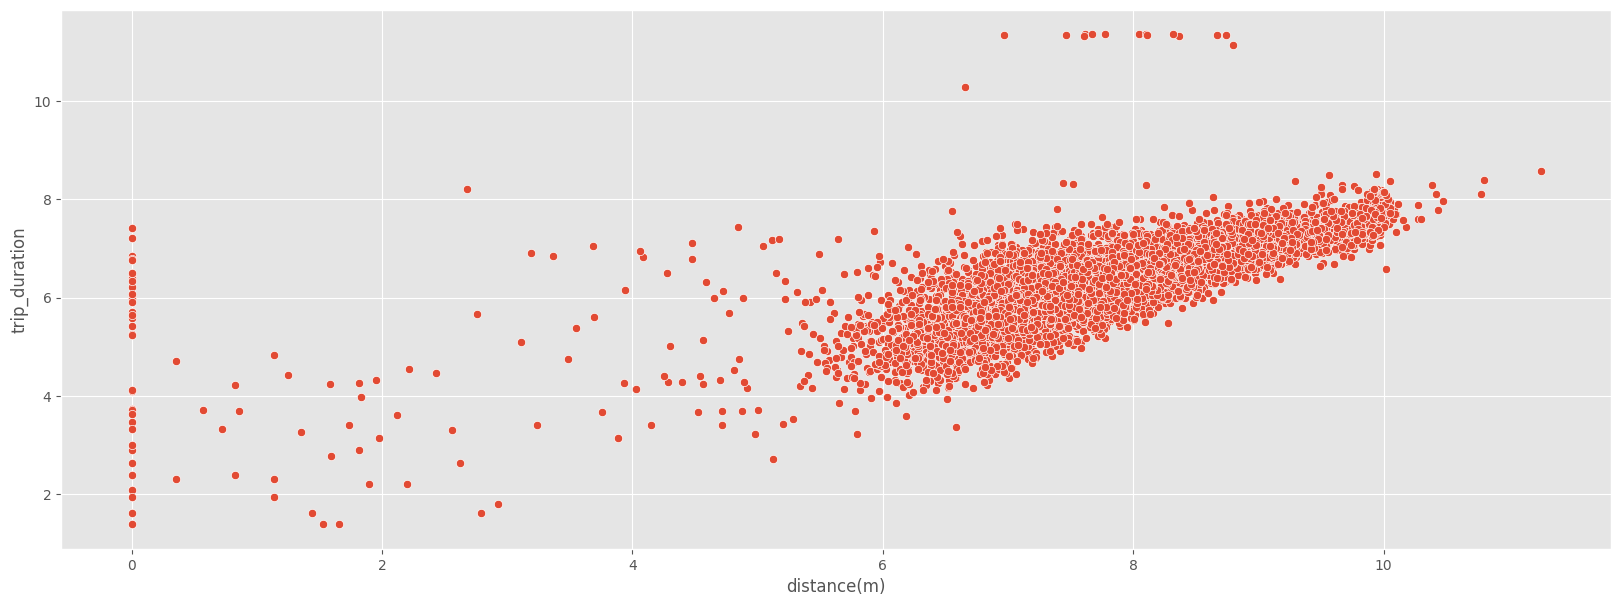

In [61]:
plt.figure(figsize=(20,7))
sample['distance(m)'] = np.log1p(sample['distance(m)'])
sample['trip_duration'] = np.log1p(sample['trip_duration'])
sns.scatterplot(sample, x = 'distance(m)', y='trip_duration', palette='coolwarm')        

# Preparing Data For The Model 

In [62]:
df

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
pickup_datetime,,,,,,
2016-01-01 00:00:53,1,-73.985085,40.747166,-73.958038,40.717491,7.166266
2016-01-01 00:01:20,1,-73.970108,40.759800,-73.989357,40.742989,6.602588
2016-01-01 00:01:47,2,-73.993103,40.752632,-73.953903,40.816540,7.094235
2016-01-01 00:02:06,1,-73.985443,40.735710,-73.957489,40.811611,7.178545
2016-01-01 00:02:45,1,-73.993736,40.741760,-74.004669,40.745468,6.100319
...,...,...,...,...,...,...
2016-06-30 23:58:47,2,-73.991402,40.750122,-73.989288,40.773579,6.745236
2016-06-30 23:58:52,1,-73.982750,40.745289,-73.969002,40.757950,6.159095
2016-06-30 23:59:09,2,-73.955109,40.689564,-73.978203,40.685802,6.626718


In [63]:
# train_approach1 = df.copy()
# train_approach1.to_csv()

In [64]:
# distances = []
# for i in range(df.shape[0]):
#     pickup = (df.iloc[i,2], df.iloc[i,1])
#     dropoff = (df.iloc[i,4], df.iloc[i,3])
#     distance_meters = geodesic(pickup, dropoff).meters
#     distances.append(distance_meters)
# train_approach2 = df.copy()
# train_approach2['distances'] = distances
# train_approach2['distances'] = train_approach2['distances'].astype('int')
# train_approach2.drop(columns=['pickup_longitude', 'pickup_latitude','dropoff_longitude','dropoff_latitude'], inplace=True)
# train_approach2.to_csv('./train_approach2.csv')

# 4.Some comparisons About Two Models
## 1. Performace For Each Model (MAPE, R2, RMSE)
## 2. How Much Data Make Each Model Saturated

In [393]:
model_app1 = joblib.load('./My Sol/models/model_app1.pkl')
model_app2 = joblib.load('./My Sol/models/model_app2-V1.pkl')

scalar_app1 = joblib.load('./My Sol/models/std_app1.pkl')
scalar_app2 = joblib.load('./My Sol/models/std_app2.pkl')

In [394]:
data_app1 = pd.read_csv('./My Sol/TestingData/approach1Test.csv', index_col='Unnamed: 0')
data_app2 = pd.read_csv('./My Sol/TestingData/approach2Test.csv', index_col='Unnamed: 0')

In [395]:
data_app1

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
0,1,-73.988609,40.748978,-73.992798,40.763409,437
1,2,-74.012787,40.715820,-74.002220,40.740219,676
2,1,-73.968391,40.768036,-73.990997,40.760632,1033
3,2,-73.991753,40.738033,-73.863556,40.767456,3194
4,1,-73.862984,40.769592,-73.989059,40.758305,1328
...,...,...,...,...,...,...
229317,1,-73.996506,40.753269,-73.997215,40.734928,468
229318,2,-73.955032,40.777328,-74.006203,40.749424,1281
229319,1,-73.973618,40.763920,-73.983849,40.749874,833
229320,1,-74.006195,40.734283,-73.949608,40.785282,1285


In [396]:
data_app2

,passenger_count,distances,trip_duration
0,1,1641,437
1,2,2852,676
2,1,2078,1033
3,2,11308,3194
4,1,10718,1328
...,...,...,...
229317,1,2037,468
229318,2,5316,1281
229319,1,1783,833
229320,1,7409,1285


In [397]:
def model_evaluation(mod, scalar, test_x, test_y, type='Testing', approach1 = True):
    #Trasforming Proccess
    test_x = scalar.transform(test_x)
    test_y = np.log1p(test_y)

    pred = mod.predict(test_x)
    mape = MAPE(test_y, pred) * 100
    r2 = r2_score(test_y, pred)
    rmse = np.sqrt(mean_squared_error(test_y, pred))
    if approach1:
        print(f'{type + 'For '+ 'approach1 '}\n R2 : {r2}\nMAPE : {mape}\nRMSE : {rmse}\n')
    else:
        print(f'{type + 'For '+ 'approach2 '}\n R2 : {r2}\nMAPE : {mape}\nRMSE : {rmse}\n')

    return r2, mape, rmse


In [398]:
x1, y1 = data_app1.iloc[:,:-1].values, data_app1.iloc[:,-1]
x2, y2 = data_app2.iloc[:,:-1].values, data_app2.iloc[:,-1]

In [399]:
metrics1 = model_evaluation(model_app1, scalar_app1, x1, y1)
metrics2 = model_evaluation(model_app2, scalar_app2, x2, y2, approach1=False)

TestingFor approach1 
 R2 : 0.03690830078655971
MAPE : 9.878708455804684
RMSE : 0.7810771419287019

TestingFor approach2 
 R2 : 0.37101747159392984
MAPE : 7.782125984080008
RMSE : 0.6312180359266296



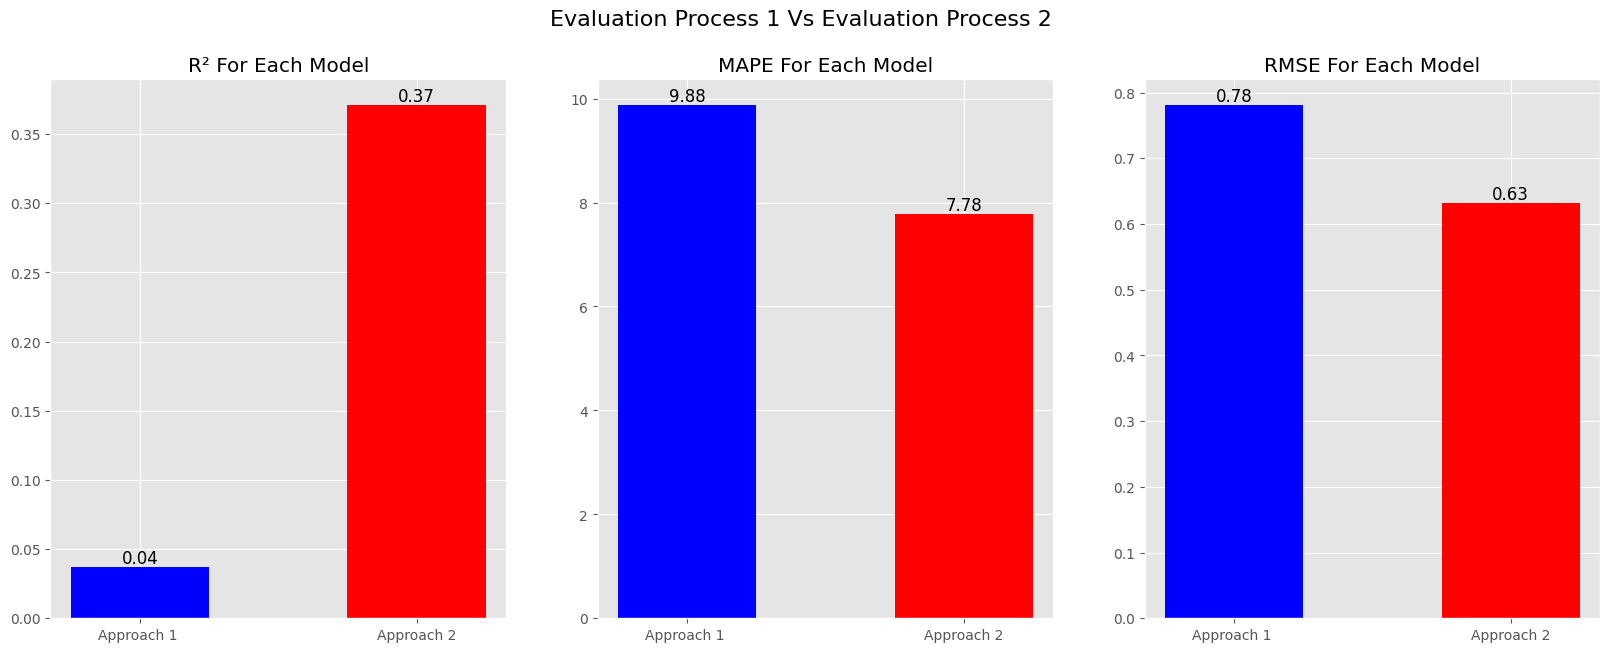

In [400]:
evaluation(metrics1, metrics2, 'Approach 1 ', 'Approach 2')

# 5. Model Evaluation (Try 1):

## 5.1: Removing more outliers

In [414]:
df2 = pd.read_csv('./My Sol/data/train_approach2.csv', parse_dates=['pickup_datetime'])
df2.set_index('pickup_datetime', drop=True, inplace=True)


In [415]:
df2['trip_duration'] = np.exp(df2['trip_duration']) + 1
df2

,passenger_count,trip_duration,distances
pickup_datetime,,,
2016-01-01 00:00:53,1,1296.0,4009
2016-01-01 00:01:20,1,738.0,2475
2016-01-01 00:01:47,2,1206.0,7830
2016-01-01 00:02:06,1,1312.0,8752
2016-01-01 00:02:45,1,447.0,1011
...,...,...,...
2016-06-30 23:58:47,2,851.0,2610
2016-06-30 23:58:52,1,474.0,1823
2016-06-30 23:59:09,2,756.0,1996


In [416]:
df2['zscore'] = (df2['trip_duration'] - df2['trip_duration'].mean()) / df2['trip_duration'].std()
threshold = 1
df2 = df2[abs(df2['zscore']) < threshold] 
df2.drop(columns=['zscore'], inplace=True)
df2['trip_duration'] = np.log1p(df2['trip_duration'])
df2

,passenger_count,trip_duration,distances
pickup_datetime,,,
2016-01-01 00:00:53,1,7.167809,4009
2016-01-01 00:01:20,1,6.605298,2475
2016-01-01 00:01:47,2,7.095893,7830
2016-01-01 00:02:06,1,7.180070,8752
2016-01-01 00:02:45,1,6.104793,1011
...,...,...,...
2016-06-30 23:58:47,2,6.747587,2610
2016-06-30 23:58:52,1,6.163315,1823
2016-06-30 23:59:09,2,6.629363,1996


In [417]:
dates = df2.index.date

## 5.2: Applying One Hot Encoding in Passenger Count

In [418]:
df2.reset_index(drop=True, inplace=True)

In [419]:
ohe = OneHotEncoder()
ohe_array = ohe.fit_transform(df2['passenger_count'].values.reshape(-1, 1)).toarray()
columns = ohe.get_feature_names_out(['number'])
ohe_df = pd.DataFrame(data=ohe_array, columns=columns)
newDF2 = pd.concat([df2.drop(columns=['passenger_count']), ohe_df], axis=1, join='inner')
newDF2

,trip_duration,distances,number_0,number_1,number_2,number_3,number_4,number_5,number_6,number_7
0,7.167809,4009,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6.605298,2475,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7.095893,7830,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,7.180070,8752,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6.104793,1011,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
995001,6.747587,2610,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
995002,6.163315,1823,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
995003,6.629363,1996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
995004,7.843456,10231,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## 5.3: Adding new feature (Speed Feature)

In [420]:
newDF2['speed'] = newDF2['distances'] / (np.exp(newDF2['trip_duration']) + 1)

In [421]:
newDF2

,trip_duration,distances,number_0,number_1,number_2,number_3,number_4,number_5,number_6,number_7,speed
0,7.167809,4009,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.088598
1,6.605298,2475,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.344595
2,7.095893,7830,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6.481788
3,7.180070,8752,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6.660578
4,6.104793,1011,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.251670
...,...,...,...,...,...,...,...,...,...,...,...
995001,6.747587,2610,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.059789
995002,6.163315,1823,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.829832
995003,6.629363,1996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.633245
995004,7.843456,10231,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.012157


## 5.4 Evaluating the new_model

In [422]:
def evaluation(metrics1, metrics2, model1_name='1', model2_name='2'):
    fig, axis = plt.subplots(nrows=1, ncols=3, figsize=(20, 7))
    models = [model1_name, model2_name]
    colors = ['blue', 'red']
    
    # Plot R²
    for i, model in enumerate(models):
        axis[0].bar(model, metrics1[0] if i == 0 else metrics2[0], color=colors[i], width=0.5)
        axis[0].text(i, metrics1[0] if i == 0 else metrics2[0], 
                     f"{metrics1[0] if i == 0 else metrics2[0]:.2f}", 
                     ha='center', va='bottom', fontsize=12)
    axis[0].set_title('R² For Each Model')
    
    # Plot MAPE
    for i, model in enumerate(models):
        axis[1].bar(model, metrics1[1] if i == 0 else metrics2[1], color=colors[i], width=0.5)
        axis[1].text(i, metrics1[1] if i == 0 else metrics2[1], 
                     f"{metrics1[1] if i == 0 else metrics2[1]:.2f}", 
                     ha='center', va='bottom', fontsize=12)
    axis[1].set_title('MAPE For Each Model')
    
    # Plot RMSE
    for i, model in enumerate(models):
        axis[2].bar(model, metrics1[2] if i == 0 else metrics2[2], color=colors[i], width=0.5)
        axis[2].text(i, metrics1[2] if i == 0 else metrics2[2], 
                     f"{metrics1[2] if i == 0 else metrics2[2]:.2f}", 
                     ha='center', va='bottom', fontsize=12)
    axis[2].set_title('RMSE For Each Model')
    
    # Set a global title for the figure
    fig.suptitle('Evaluation Process 1 Vs Evaluation Process 2', fontsize=16)
    
    # Show the plot
    plt.show()


In [423]:
x = newDF2.iloc[:, 1: ]
y = newDF2.iloc[:, 0]
xTrain, xVal, yTrain, yVal = train_test_split(x, y, train_size=0.95)

In [424]:
sc = MinMaxScaler()
xTrain = sc.fit_transform(xTrain)
xVal = sc.transform(xVal)

In [425]:

mod = Ridge()
mod.fit(xTrain, yTrain)

pred = mod.predict(xVal)
mape = MAPE(yVal, pred) * 100
r2 = r2_score(yVal, pred)
rmse = np.sqrt(mean_squared_error(yVal, pred))
metrics_after = [r2, mape, rmse]
print(f'R2 : {r2}\nMAPE : {mape}\nRMSE : {rmse}\n')


R2 : 0.42922144361734393
MAPE : 6.728579067598768
RMSE : 0.5686041301624829



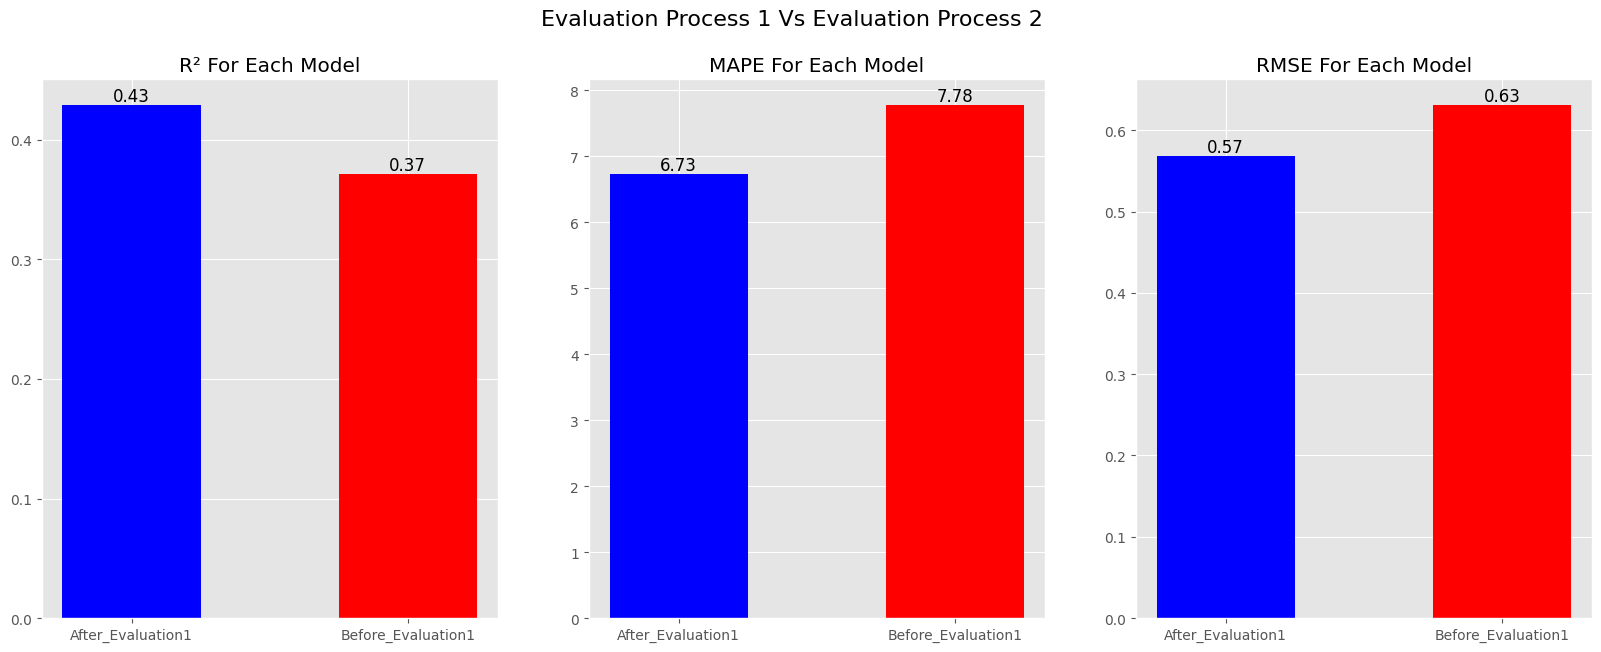

In [427]:
evaluation(metrics_after, metrics2, 'After_Evaluation1', 'Before_Evaluation1')

# 6.Evaluation Process two: (Adding Weather Stutes)

In [428]:
weather = pd.read_csv('./My Sol/data/nycWeather2016.csv')

## 6.1: Preprocessing the data

In [429]:
weather.isna().sum()

date                   0
maximum temperature    0
minimum temperature    0
average temperature    0
precipitation          0
snow fall              0
snow depth             0
dtype: int64

In [430]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 366 non-null    object 
 1   maximum temperature  366 non-null    int64  
 2   minimum temperature  366 non-null    int64  
 3   average temperature  366 non-null    float64
 4   precipitation        366 non-null    object 
 5   snow fall            366 non-null    object 
 6   snow depth           366 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 20.1+ KB


In [431]:
weather.describe()

,maximum temperature,minimum temperature,average temperature
count,366.000000,366.000000,366.000000
mean,64.625683,49.806011,57.215847
std,18.041787,16.570747,17.124760
min,15.000000,-1.000000,7.000000
25%,50.000000,37.250000,44.000000
50%,64.500000,48.000000,55.750000
75%,81.000000,65.000000,73.500000
max,96.000000,81.000000,88.500000


In [432]:
weather['precipitation'] = weather['precipitation'].str.replace('T', '0.001').astype('float32')
weather['snow fall'] = weather['snow fall'].str.replace('T', '0.001').astype('float32')
weather['snow depth'] = weather['snow depth'].str.replace('T', '0.001').astype('float32')

In [433]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 366 non-null    object 
 1   maximum temperature  366 non-null    int64  
 2   minimum temperature  366 non-null    int64  
 3   average temperature  366 non-null    float64
 4   precipitation        366 non-null    float32
 5   snow fall            366 non-null    float32
 6   snow depth           366 non-null    float32
dtypes: float32(3), float64(1), int64(2), object(1)
memory usage: 15.9+ KB


## 6.2: Joining the dataset of last evaluation with current evaluation process

In [434]:
datesDF = pd.DataFrame(dates, columns= ['dates'])
newDF3 = newDF2.copy()
newDF3['dates'] = datesDF['dates']

In [435]:
newDF3['dates'] = pd.to_datetime(newDF3['dates'])
weather['date'] =  pd.to_datetime(weather['date'], dayfirst=True)

In [436]:
newDF3 = newDF3.merge(right=weather, left_on='dates', right_on='date')

In [437]:
#Dropping unnesscarry columns
newDF3.drop(columns=['maximum temperature', 'minimum temperature'], inplace=True)

In [438]:
newDF3['distances'] /= 1000
newDF3['trip_duration'] = (np.exp(newDF3['trip_duration']) - 1) / 60

In [439]:
newDF3['speed'] = newDF3['distances'] / newDF3['trip_duration']

In [440]:
newDF3['hour'] = newDF3['dates'].dt.hour
newDF3['day'] = newDF3['dates'].dt.day
newDF3['day_of_week'] = newDF3['dates'].dt.dayofweek


In [442]:
newDF3.set_index('date', inplace=True)
newDF3.index = pd.to_datetime(newDF3.index)
newDF3.drop(columns='dates', inplace=True)

In [443]:
newDF3

,trip_duration,distances,number_0,number_1,number_2,number_3,number_4,number_5,number_6,number_7,speed,average temperature,precipitation,snow fall,snow depth,hour,day,day_of_week
date,,,,,,,,,,,,,,,,,,
2016-01-01,21.600000,4.009,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.185602,38.0,0.0,0.0,0.0,0,1,4
2016-01-01,12.300000,2.475,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.201220,38.0,0.0,0.0,0.0,0,1,4
2016-01-01,20.100000,7.830,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.389552,38.0,0.0,0.0,0.0,0,1,4
2016-01-01,21.866667,8.752,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.400244,38.0,0.0,0.0,0.0,0,1,4
2016-01-01,7.450000,1.011,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.135705,38.0,0.0,0.0,0.0,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-06-30,14.183333,2.610,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.184019,76.0,0.0,0.0,0.0,0,30,3
2016-06-30,7.900000,1.823,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.230759,76.0,0.0,0.0,0.0,0,30,3
2016-06-30,12.600000,1.996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.158413,76.0,0.0,0.0,0.0,0,30,3


## 6.3 Remove Outliers Using IQR

In [516]:
for column in newDF3.columns:
    if column != 'dates' and newDF3[column].describe()['std'] > 4:
        IQR = newDF3[column].quantile(0.75) - newDF3[column].quantile(0.25)
        lower = newDF3[column].quantile(0.25) - 1.5 * IQR
        upper = newDF3[column].quantile(0.5) + 1.5 * IQR
        newDF3 = newDF3[(newDF3[column] > lower) & (newDF3[column] < upper)]

In [517]:
newDF3 = newDF3[newDF3['trip_duration'] > 1]
newDF3

,trip_duration,distances,number_0,number_1,number_2,number_3,number_4,number_5,number_6,number_7,speed,average temperature,precipitation,snow fall,snow depth,hour,day,day_of_week
date,,,,,,,,,,,,,,,,,,
2016-01-01,21.600000,4.009,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.185602,38.0,0.0,0.0,0.0,0,1,4
2016-01-01,12.300000,2.475,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.201220,38.0,0.0,0.0,0.0,0,1,4
2016-01-01,20.100000,7.830,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.389552,38.0,0.0,0.0,0.0,0,1,4
2016-01-01,21.866667,8.752,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.400244,38.0,0.0,0.0,0.0,0,1,4
2016-01-01,7.450000,1.011,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.135705,38.0,0.0,0.0,0.0,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-06-30,10.383333,1.772,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.170658,76.0,0.0,0.0,0.0,0,30,3
2016-06-30,10.966667,2.777,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.253222,76.0,0.0,0.0,0.0,0,30,3
2016-06-30,14.183333,2.610,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.184019,76.0,0.0,0.0,0.0,0,30,3


## 6.4: Training the data with the new data (Evaluation 2)

In [530]:
x = newDF3.iloc[:, 1:].values
y = newDF3.iloc[:, 0].values
xTrain, xVal, yTrain, yVal = train_test_split(x, y , train_size=0.85, shuffle=True)

In [531]:

mod = Ridge(0.1)
mod.fit(xTrain, yTrain)

pred = mod.predict(xVal)


mape = MAPE(yVal, pred) * 100
r2 = r2_score(yVal, pred)
rmse = np.sqrt(mean_squared_error(yVal, pred))
metrics_after2 = [r2, mape, rmse]
print(f'R2 : {r2}\nMAPE : {mape}\nRMSE : {rmse}\n')


R2 : 0.7174144378010228
MAPE : 31.574022082161335
RMSE : 2.96154583337094



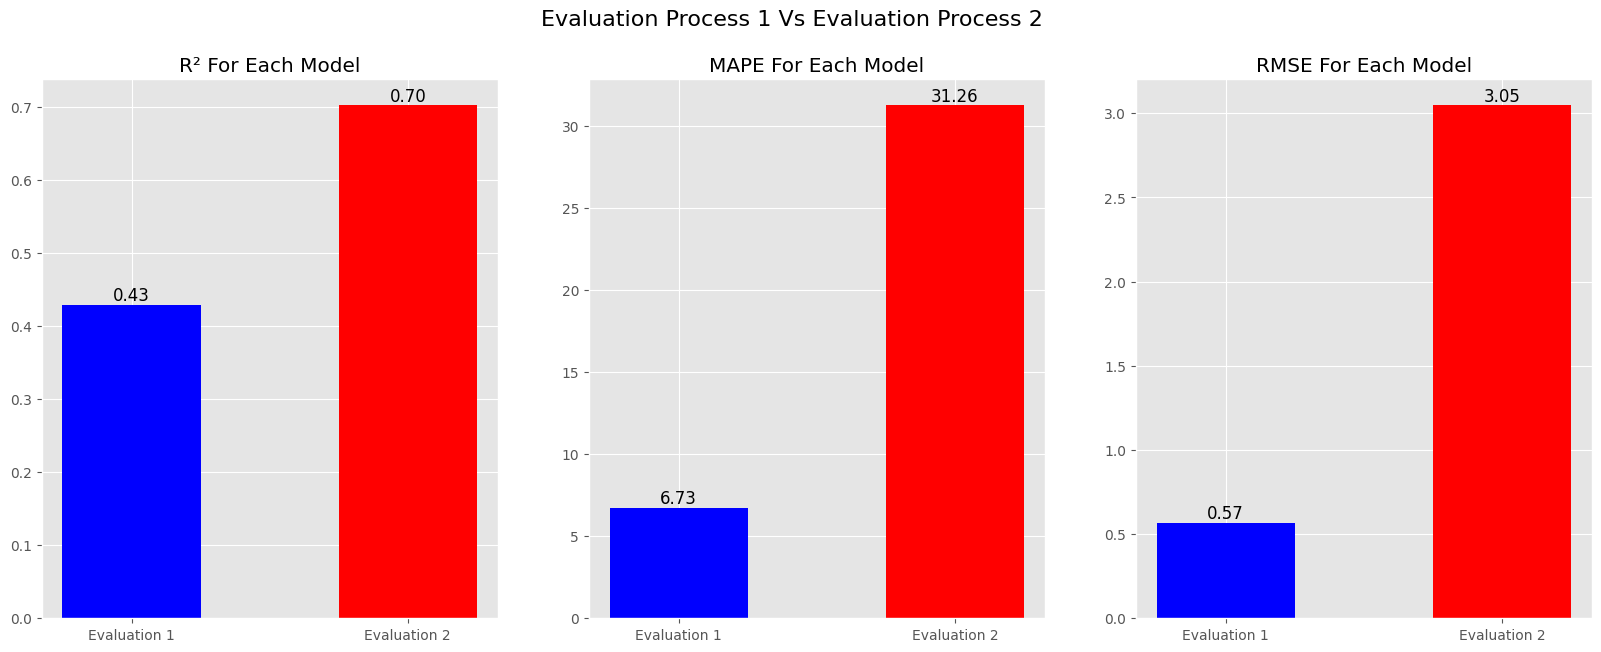

In [520]:
evaluation(metrics_after, metrics_after2, 'Evaluation 1', 'Evaluation 2')

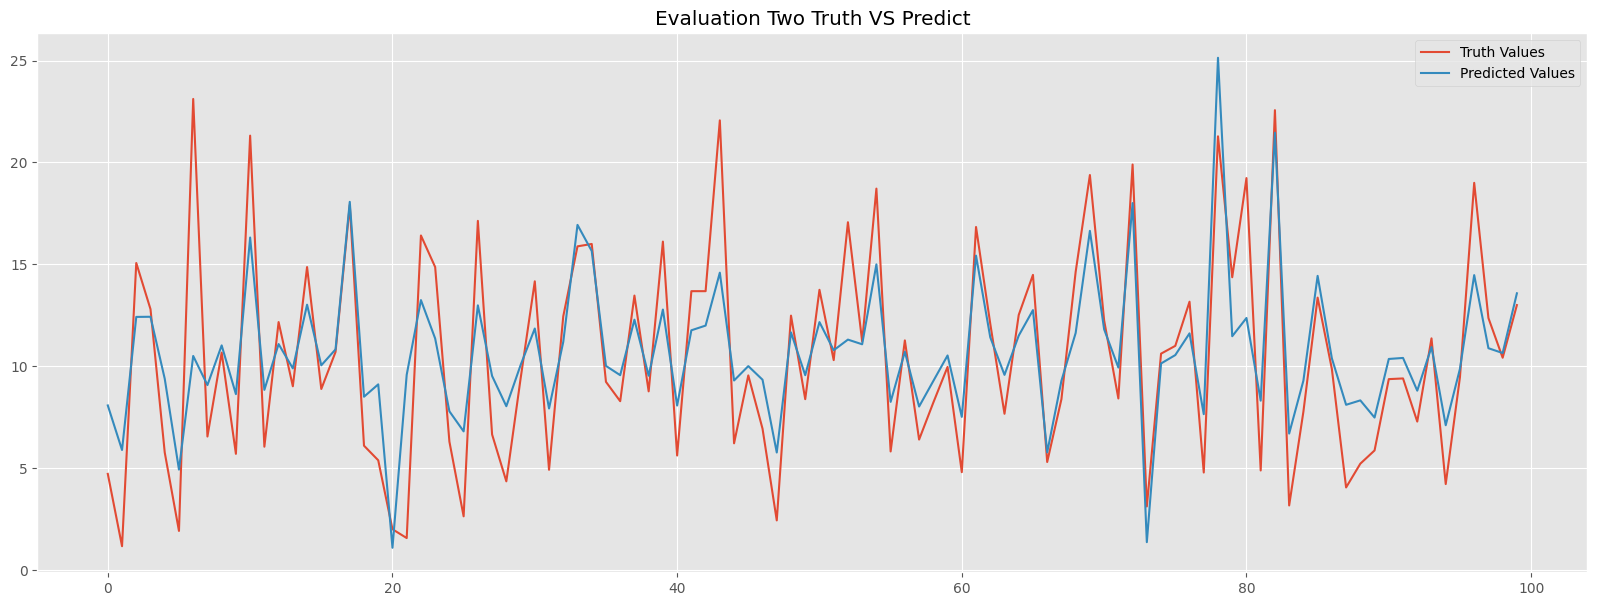

In [521]:
plt.figure(figsize=(20,7))
plt.title("Evaluation Two Truth VS Predict")
plt.plot(np.arange(100), yVal[:100], label='Truth Values')
plt.plot(np.arange(100), pred[:100], label='Predicted Values')
plt.legend()

## 6.5: Comparision Between all models

In [522]:
Rs = pd.DataFrame(data = [metrics1[0], metrics2[0], metrics_after[0], metrics_after2[0]], columns = ['R2'])

Text(0, 0.5, 'R^2 Value')

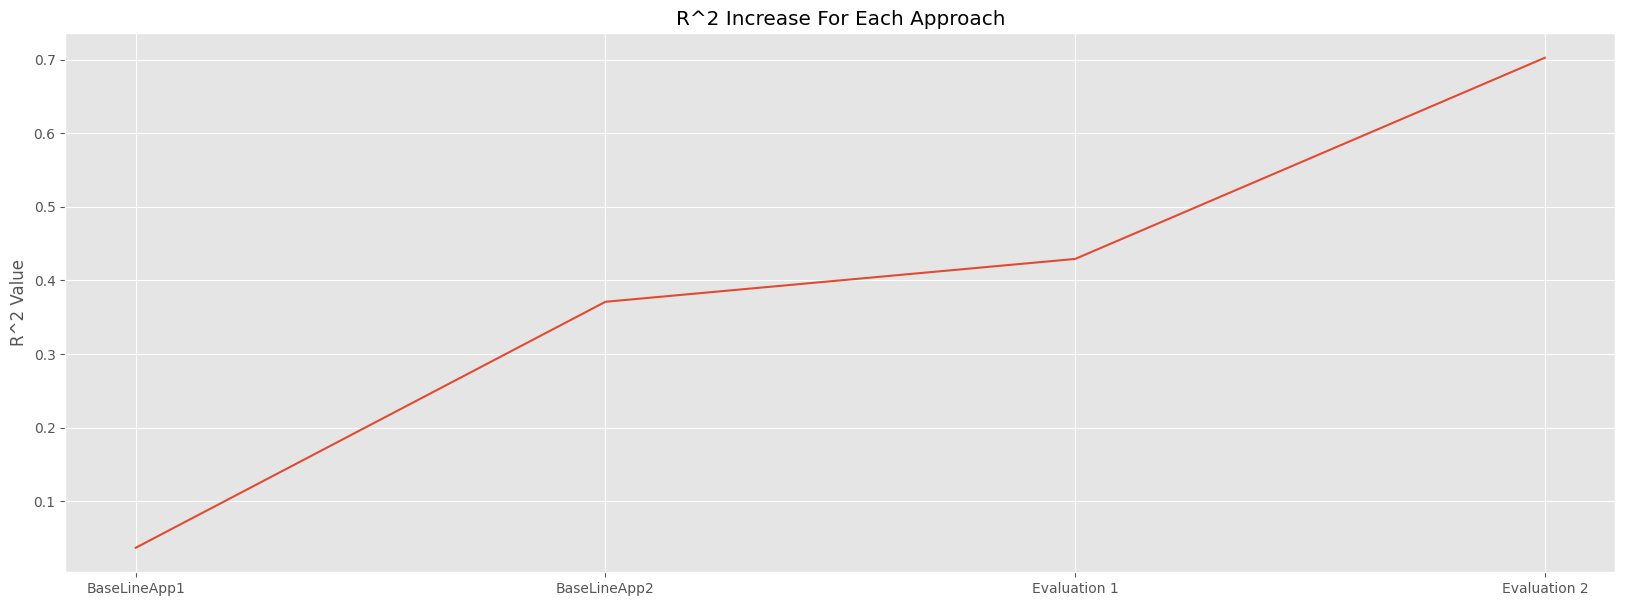

In [523]:
approaches_name = ['BaseLineApp1', 'BaseLineApp2', 'Evaluation 1', 'Evaluation 2']
plt.figure(figsize=(20,7))
plt.title('R^2 Increase For Each Approach')
plt.plot(approaches_name, Rs)
plt.ylabel('R^2 Value')

# 7. About The NoteBook
## This notebook writen by ENG/ Mohamed Saad
## See Post's Link Which Has Other Parts Of The Project 
## Link : 

In [526]:
xVal

MinMaxScaler()